# Project Dataset


**Features** : Date, Time, Water_Level(m),  Discharge_Through_Rating_Curve(cumecs)

**Target Variable** : Discharge_Through_Rating_Curve(cumecs)

The dataset used in the project was provided by the organization which was collected from the Kiru Project of NHPC, Kishtwar. The dataset deals with varing water discharge w.r.t. water level in monsoon and non-monsoon seasons.

# Imorting Essential Libraries



In [ ]:
# importing basic libraries
import numpy as np
import pandas as pd
import sklearn

# Data Uploading

In [ ]:
# Uploading data
data = pd.read_csv('water_level_and_discharges.csv')

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
data.head()

,Date,Time,Water_Level(m),Discharge_Through_Rating_Curve(cumecs)
0,13.01.2022,14:00:00,2842.6,11.4921
1,13.01.2022,15:00:00,2842.5,7.9225
2,13.01.2022,16:00:00,2842.5,7.9225
3,13.01.2022,17:00:00,2842.5,7.9225
4,13.01.2022,18:00:00,2842.5,7.9225


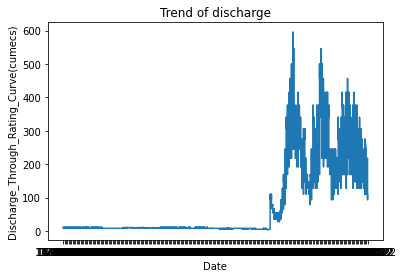

In [ ]:
#ploting graph for raw data
plt.xlabel('Date') 
plt.ylabel('Discharge_Through_Rating_Curve(cumecs)') 
plt.title("Trend of discharge")
plt.plot(data['Date'], data['Discharge_Through_Rating_Curve(cumecs)'])
plt.show()

In [ ]:
data.shape

(33128, 4)

In [ ]:
data.describe()

,Water_Level(m),Discharge_Through_Rating_Curve(cumecs)
count,33128.000000,33103.000000
mean,2840.759705,75.286291
std,79.517391,116.500745
min,0.000000,3.103300
25%,2842.500000,7.922500
50%,2842.500000,7.922500
75%,2843.700000,127.883900
max,2847.300000,595.212500


# Data Preprocessing

In [ ]:
# finding if there are null values
data.isna().sum()

Date                                       0
Time                                       0
Water_Level(m)                             0
Discharge_Through_Rating_Curve(cumecs)    25
dtype: int64

Correlation

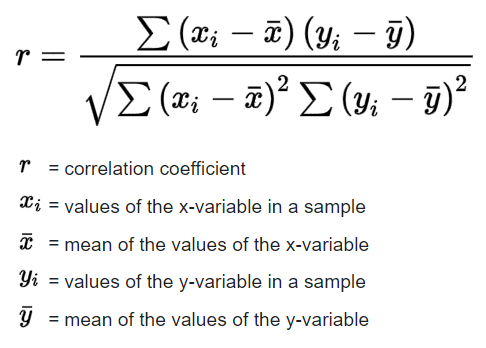

In [ ]:
# fining relationship between water level and discharge
# Correlation determines if two variables have a linear relationship while regression describes the cause and effect between the two.
# As the correlation is very low for this data regression can't be used
#Checking if linear/logistic regression can be implemented
data['Water_Level(m)'].corr(data['Discharge_Through_Rating_Curve(cumecs)'])

0.042638790106287766

In [ ]:
#droping null values
data.dropna()

,Date,Time,Water_Level(m),Discharge_Through_Rating_Curve(cumecs)
0,13.01.2022,14:00:00,2842.6,11.4921
1,13.01.2022,15:00:00,2842.5,7.9225
2,13.01.2022,16:00:00,2842.5,7.9225
3,13.01.2022,17:00:00,2842.5,7.9225
4,13.01.2022,18:00:00,2842.5,7.9225
...,...,...,...,...
33123,29.08.2022,12:40:00,2843.6,110.0041
33124,29.08.2022,12:50:00,2843.6,110.0041
33125,29.08.2022,13:00:00,2843.6,110.0041
33126,29.08.2022,13:10:00,2843.5,93.8129


In [ ]:
# Finding how many unique values are there in the the given data after removing null values
dates = data['Date'].unique()
dates

array(['13.01.2022', '14.01.2022', '15.01.2022', '16.01.2022',
       '17.01.2022', '18.01.2022', '19.01.2022', '20.01.2022',
       '21.01.2022', '22.01.2022', '23.01.2022', '24.01.2022',
       '25.01.2022', '26.01.2022', '27.01.2022', '28.01.2022',
       '29.01.2022', '30.01.2022', '31.01.2022', '01.02.2022',
       '02.02.2022', '03.02.2022', '04.02.2022', '05.02.2022',
       '06.02.2022', '07.02.2022', '08.02.2022', '09.02.2022',
       '10.02.2022', '11.02.2022', '12.02.2022', '13.02.2022',
       '14.02.2022', '15.02.2022', '16.02.2022', '17.02.2022',
       '18.02.2022', '19.02.2022', '20.02.2022', '21.02.2022',
       '22.02.2022', '23.02.2022', '24.02.2022', '25.02.2022',
       '26.02.2022', '27.02.2022', '28.02.2022', '01.03.2022',
       '02.03.2022', '03.03.2022', '04.03.2022', '05.03.2022',
       '06.03.2022', '07.03.2022', '08.03.2022', '09.03.2022',
       '10.03.2022', '11.03.2022', '12.03.2022', '13.03.2022',
       '14.03.2022', '15.03.2022', '16.03.2022', '17.03

In [ ]:
# data manipulation so that we have onne data for every date
# taking mean of all the given hours for water level for that particular day
d = []
for i in dates:
  d.append(data['Water_Level(m)'].where(data['Date'] == i).mean()) 

d

[2842.5099999999998,
 2842.504166666667,
 2842.5375,
 2842.508333333333,
 2842.508333333333,
 2842.5208333333335,
 2842.513043478261,
 2842.5208333333335,
 2842.5166666666664,
 2842.5166666666664,
 2842.504166666667,
 2842.5099999999998,
 2842.5208333333335,
 2842.5166666666664,
 2842.5500000000006,
 2729.7680000000005,
 2353.872413793103,
 2437.5178571428573,
 2842.529166666667,
 2842.525,
 2842.522916666667,
 2842.5187499999997,
 2842.529166666667,
 2842.5833333333335,
 2842.508333333333,
 2842.529166666667,
 2842.5375,
 2842.5565217391304,
 2842.566666666667,
 2842.504761904762,
 2842.5,
 2842.5,
 2842.5,
 2842.5,
 2842.5,
 2842.5,
 2842.5,
 2842.5,
 2842.5,
 2842.5,
 2842.5,
 2842.5005,
 2842.5,
 2842.5,
 2842.5,
 2842.5212500000002,
 2842.550416666667,
 2842.5520833333335,
 2842.550434782609,
 2842.5475,
 2842.5602916666667,
 2842.5591666666664,
 2842.5575000000003,
 2842.554166666667,
 2842.547916666667,
 2842.545,
 2842.5458333333336,
 2842.5495833333334,
 2842.5533333333333,
 2

In [ ]:
# taking mean of all the given hours for wwater discharge for that particular day
e = []
for i in dates:
  e.append(data['Discharge_Through_Rating_Curve(cumecs)'].where(data['Date'] == i).mean())

e

[8.27946,
 8.071233333333334,
 9.2611,
 8.219966666666666,
 8.219966666666666,
 8.666166666666667,
 8.388100000000001,
 8.666166666666667,
 8.517433333333335,
 8.517433333333335,
 8.071233333333334,
 8.27946,
 8.666166666666667,
 8.517433333333335,
 9.7073,
 9.7073,
 8.368700000000002,
 8.666166666666667,
 8.963633333333334,
 8.770691666666666,
 8.691904166666667,
 8.587379166666667,
 8.963633333333334,
 10.897166666666669,
 8.219966666666666,
 8.963633333333334,
 9.2611,
 9.9401,
 10.302233333333334,
 8.092480952380953,
 7.9225,
 7.9225,
 7.922500000000002,
 7.9225,
 7.9225,
 7.922500000000001,
 7.9225,
 7.9225,
 7.9225,
 7.9225,
 7.9225,
 7.935804166666667,
 7.9225,
 7.9225,
 7.9225,
 8.643650000000001,
 9.619770833333334,
 9.678154166666667,
 9.620965217391303,
 9.516249999999998,
 9.977395833333333,
 9.931933333333333,
 9.871799999999999,
 9.751883333333334,
 9.527783333333334,
 9.42535,
 9.454366666666667,
 9.592545833333332,
 9.727516666666666,
 9.712833333333334,
 9.63695,
 9.51

In [ ]:
# creating new dataframe from newly formed array 
f = pd.DataFrame({'Date': dates,
     'Water Level Avg': d, 
     'Discharge Avg': e})

f

,Date,Water Level Avg,Discharge Avg
0,13.01.2022,2842.510000,8.279460
1,14.01.2022,2842.504167,8.071233
2,15.01.2022,2842.537500,9.261100
3,16.01.2022,2842.508333,8.219967
4,17.01.2022,2842.508333,8.219967
...,...,...,...
224,25.08.2022,2823.032593,219.047334
225,26.08.2022,2844.035971,204.714678
226,27.08.2022,2844.007639,199.669988
227,28.08.2022,2843.961702,188.336896


# Ploting Graph for new data set

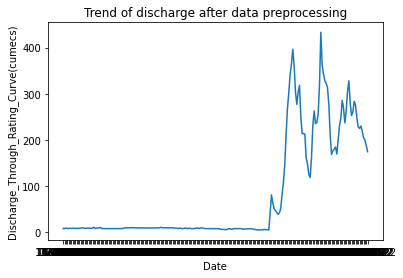

In [ ]:
# ploting water level wrt date
plt.xlabel('Date') 
plt.ylabel('Discharge_Through_Rating_Curve(cumecs)') 
plt.title("Trend of discharge after data preprocessing")
import matplotlib.pyplot as plt
plt.plot(f['Date'],f['Discharge Avg'])

In [ ]:
# Rolling averages are useful for finding long-term trends otherwise disguised by occasional fluctuations.
rollmean = f['Discharge Avg'].rolling(window = 5).mean()

In [ ]:
rollmean

0             NaN
1             NaN
2             NaN
3             NaN
4        8.410345
          ...    
224    229.928489
225    221.319962
226    215.700786
227    208.379740
228    197.250243
Name: Discharge Avg, Length: 229, dtype: float64

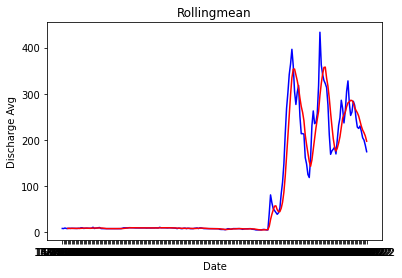

In [ ]:
# graph ploting
plt.xlabel('Date') 
plt.ylabel('Discharge Avg') 
plt.title("Rollingmean")
plt.plot(f['Date'],f['Discharge Avg'], color = 'blue')
plt.plot(f['Date'],rollmean, color = 'red')

# Splitting and Training of Dataset

In [ ]:
# Splitting into test and train 
size = len(f['Discharge Avg'])
train = f['Discharge Avg'][:int((0.7*size))]
test = f['Discharge Avg'][int((0.7*size)):]

# K Means Clustering

In [ ]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
x = f.iloc[:,1:2]

In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

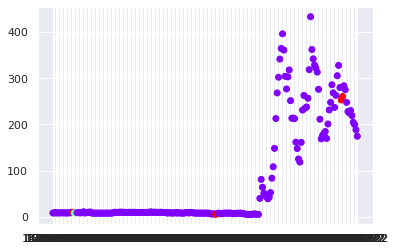

In [ ]:
data_with_clusters = f.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Date'],data_with_clusters['Discharge Avg'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
model = KMeans(n_clusters=25, init='k-means++',random_state=32)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
print(x_scaled[:])

[[0.99546191]
 [0.99545003]
 [0.99551794]
 [0.99545852]
 [0.99545852]
 [0.99548398]
 [0.99546811]
 [0.99548398]
 [0.99547549]
 [0.99547549]
 [0.99545003]
 [0.99546191]
 [0.99548398]
 [0.99547549]
 [0.9955434 ]
 [0.76578174]
 [0.        ]
 [0.17040411]
 [0.99550096]
 [0.99549247]
 [0.99548823]
 [0.99547974]
 [0.99550096]
 [0.99561131]
 [0.99545852]
 [0.99550096]
 [0.99551794]
 [0.99555669]
 [0.99557736]
 [0.99545124]
 [0.99544154]
 [0.99544154]
 [0.99544154]
 [0.99544154]
 [0.99544154]
 [0.99544154]
 [0.99544154]
 [0.99544154]
 [0.99544154]
 [0.99544154]
 [0.99544154]
 [0.99544256]
 [0.99544154]
 [0.99544154]
 [0.99544154]
 [0.99548483]
 [0.99554425]
 [0.99554765]
 [0.99554429]
 [0.99553831]
 [0.99556437]
 [0.99556208]
 [0.99555868]
 [0.99555189]
 [0.99553916]
 [0.99553322]
 [0.99553491]
 [0.99554255]
 [0.99555019]
 [0.99554934]
 [0.9955451 ]
 [0.99553831]
 [0.99553746]
 [0.99552133]
 [0.99552982]
 [0.99553491]
 [0.99552473]
 [0.99553576]
 [0.99553322]
 [0.99552897]
 [0.99554765]
 [0.99

In [ ]:
model.fit(x_scaled)

KMeans(n_clusters=25, random_state=32)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score_average = silhouette_score(x_scaled, model.predict(x_scaled))
print(silhouette_score_average)

0.6067297369026806


# ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model_fit = ARIMA(f['Discharge Avg'], order=(1,0,0)).fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Discharge Avg   No. Observations:                  229
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1005.286
Date:                Thu, 02 Feb 2023   AIC                           2016.571
Time:                        02:55:56   BIC                           2026.872
Sample:                             0   HQIC                          2020.727
                                - 229                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.6938    138.116      0.563      0.574    -193.009     348.397
ar.L1          0.9838      0.012     82.702      0.000       0.960       1.007
sigma2       374.9443     16.375     22.898      0.0

In [ ]:
y_pred = model_fit.forecast()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

Here, we will be using ARIMA model to predict the discharge wrt water level. ARIMA is a form of regression analysis that indicates the strength of a dependent variable relative to other changing variables. The final objective of the model is to predict future time series movement by examining the differences between values in the series instead of through actual values. It is generally used for short term prediction of stock market.


In [ ]:
test = np.array(test)
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=43.580071, expected=43.149316
predicted=39.994238, expected=38.936662
predicted=36.130157, expected=42.273621
predicted=39.515315, expected=52.411177
predicted=49.762386, expected=83.600653
predicted=82.273052, expected=108.341855


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=107.681940, expected=148.200524
predicted=147.739460, expected=212.762415
predicted=212.316640, expected=268.240647
predicted=267.825839, expected=302.231219
predicted=301.854783, expected=341.543342
predicted=341.191786, expected=364.541971
predicted=364.211283, expected=396.258954
predicted=395.945890, expected=361.077001
predicted=360.704308, expected=304.224809
predicted=303.639861, expected=276.794687
predicted=276.104139, expected=302.967034
predicted=302.347066, expected=318.058511
predicted=317.477414, expected=251.470740
predicted=250.467108, expected=213.438248
predicted=212.194370, expected=213.751911
predicted=212.529224, expected=212.551210
predicted=211.343164, expected=161.757012
predicted=160.386899, expected=147.834937
predicted=146.528556, expected=125.166194
predicted=123.986491, expected=118.573079
predicted=117.456875, expected=161.091085
predicted=159.655376, expected=231.057844
predicted=229.455544, expected=262.789036
predicted=261.329715, expected=235

Root mean squared error is an absolute error measure that squares the deviations to keep the positive and negative deviations from canceling one another out.

# Result of the best model (ARIMA)

Test RMSE: 34.708551


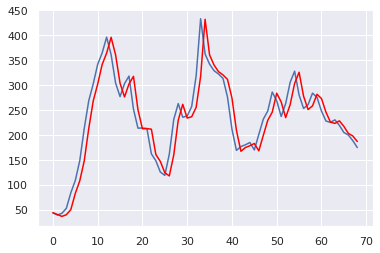

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()